<a href="https://colab.research.google.com/github/datascientist-ld1981/OpenCV/blob/main/Open_CV_Edge_and_Contour_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

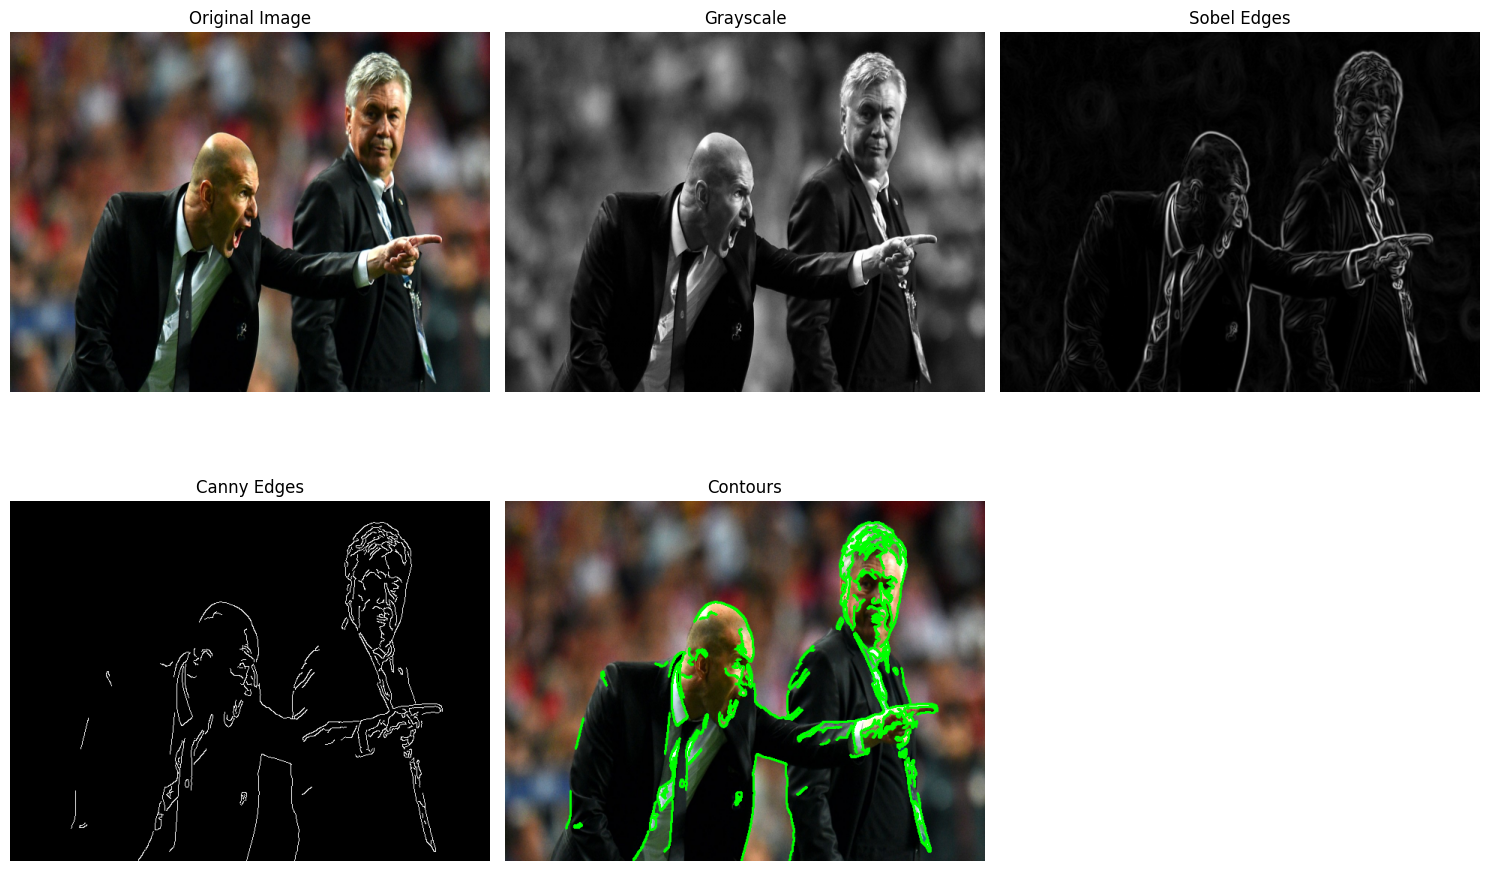

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded image
image = cv2.imread('road_scene.jpg')
image = cv2.resize(image, (640, 480))

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Sobel Edge Detection
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Canny Edge Detection
canny_edges = cv2.Canny(blurred, 100, 200)

# Contour Detection on Canny edges
contours, _ = cv2.findContours(canny_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Convert images to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
contour_image_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)

# Display results
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Grayscale")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Sobel Edges")
plt.imshow(sobel_combined, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("Canny Edges")
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Contours")
plt.imshow(contour_image_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()
